<a href="https://www.kaggle.com/code/debarpanml/american-express-train-eda?scriptVersionId=102453034" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1 Introduction
Kaggle describes this competition as [follows](https://www.kaggle.com/competitions/amex-default-prediction/data):

The objective of this competition is to predict the **probability** that a customer does not pay back their credit card balance amount in the future based on their monthly customer profile. The target binary variable is calculated by observing 18 months performance window after the latest credit card statement, and if the customer does not pay due amount in 120 days after their latest statement date it is considered a default event.

# 2 Loading and Exploring Data

# 2.1 Loading the libraries and data

Loading Python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import TargetEncoder

Loading train (train_x and train_y) dataset from csv files.

In [2]:
train_x= pd.read_parquet("../input/amex-data-integer-dtypes-parquet-format/train.parquet")
train_y= pd.read_csv("../input/amex-default-prediction/train_labels.csv")

# 2.2 Data size and structure

From the shape of train_x and train_y we could conclude that train_x contain multiple statments for a single customer and train_y is the prediction that whether a particular customer with a unique customer ID is a defaulter or not.

In [3]:
train_x.shape

(5531451, 190)

In [4]:
train_y.shape

(458913, 2)

Below is a glimps of the training data and training lables

In [5]:
pd.set_option("display.max_columns",1000)
pd.set_option("display.max_rows",1000)

In [6]:
train_x.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.0,0.004709,NaN,NaN,0,6,0.708906,0.170600,0,0.358587,0.525351,0.255736,-1,0.063902,0.059416,0.0,0.148698,4,0.008207,0,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0,1.0,0,0.161345,0.148266,2896,0.354596,0.152025,0.118075,0,0.158612,0.065728,0.018385,8,0.199617,0.308233,0.016361,15,0.091071,0,0,0,0,NaN,0.652984,0,-1,0,6,0.272008,0.008363,524,0.002644,0.009013,0,0,0.119403,0,4,0.050882,NaN,0.0,1,1,NaN,0.004327,0.0,NaN,0.007729,0.000272,0,0,0,-1,0.002271,0,0,0,0.002310,0,1,0.008033,1.0,0.084683,0,0,0.0,0,0,0,NaN,0,0,0,-1,0,0,NaN,1,0.002537,0,0,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1,1.004587,0.893734,-1,2,0.009968,0.004572,-1,1.008949,2,-1,0,NaN,-1,NaN,1.0,0.210060,0.676922,0,1,0.238250,0,5,0.232120,0.236266,0,0.702280,3,0,16,0,2,1,1.007819,1,0,NaN,0.0,0.0,NaN,0.004345,0,NaN,-1,-1,-1,-1,0,0,0.0,NaN,0,0.000610,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0,0.004923,1.000653,0.006151,0.126750,0.0,0.002714,NaN,NaN,0,5,0.712795,0.113239,0,0.353630,0.521311,0.223329,-1,0.065261,0.057744,0.0,0.149723,4,0.008373,0,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0,1.0,0,0.140951,0.143530,2896,0.326757,0.156201,0.118737,0,0.148459,0.093935,0.013035,8,0.151387,0.265026,0.017688,15,0.086805,0,0,0,0,NaN,0.647093,0,-1,0,6,0.188970,0.004030,524,0.004193,0.007842,0,0,0.140611,0,4,0.040469,NaN,0.0,1,1,NaN,0.004203,0.0,NaN,0.001864,0.000979,0,0,0,-1,0.009810,0,0,0,0.001327,0,1,0.000760,1.0,0.081843,0,0,0.0,0,0,0,NaN,0,0,0,-1,0,0,NaN,1,0.008427,0,0,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0.902135,0.136333,0.919876,0.975625,0.004561,0.786007,1,1.004118,0.906841,-1,2,0.003921,0.004654,-1,1.003205,2,-1,0,NaN,-1,NaN,1.0,0.184093,0.822281,0,1,0.247217,0,5,0.243532,0.241885,0,0.707017,3,0,16,0,2,1,1.004333,1,0,NaN,0.0,0.0,NaN,0.007495,0,NaN,-1,-1,-1,-1,0,0,0.0,NaN,0,0.005492,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,3,0.021655,1.009672,0.006815,0.123977,0.0,0.009423,NaN,NaN,0,5,0.720884,0.060492,0,0.334650,0.524568,0.189424,-1,0.066982,0.056647,0.0,0.151955,4,0.009355,0,0.206629,0.738044,0.134073,NaN,0.048367,0.010077,0,1.0,0,0.112229,0.137014,3166,0.304124,0.153795,0.114534,0,0.139504,0.084757,0.056653,8,0.305883,0.212165,0.063955,15,0.094001,0,0,0,0,NaN,0.645819,0,-1,0,6,0.495308,0.006838,702,0.001337,0.006025,0,0,0.075868,0,4,0.047454,NaN,0.0,1,1,NaN,0.001782,0.0,NaN,0.005419,0.006149,0,0,0,-1,0.009362,0,0,0,0.007624,0,1,0.004056,1.0,0.081954,0,0,0.0,0,0,0,NaN,0,0,0,-1,0,0,NaN,1,0.007327,0,0,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0.939654,0.134938,0.958699,0.974067,0.011736,0.806840,1,1.009285,0.928719,-1,2,0.001264,0.019176,-1,1.000754,2,-1,0,NaN,-1,NaN,1.0,0.154837,0.853498,0,1,0.239867,0,5,0.240768,0.239710,0,0.704843,3,0,16,0,2,1,1.007831,1,0,NaN,0.0,0.0,NaN,0.009227,0,NaN,-1,-1,-1,-1,0,0,0.0,NaN,0,0.006986,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0,0.013683,1.0027

In [7]:
train_y.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


Thus there are 189 features(without customer_ID) out of which ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68'] are categorical features and 1 binary target.

# 3 Exploring some of the most important variables

# 3.1 Response variable - target

Note that the negative class has been subsampled for this dataset at 5%, and thus receives a 20x weighting in the scoring metric. Thus from the plot we can conclude that in real life the number of defaulter is significantly less.

defaulter : not_defaulter =1:3.5 (Approx)

not_defaulter is subsampled at 5 % so propotional number of not_defaulter =3.5 * 20 = 70.

Thus the new ratio should be equal to 1:70.

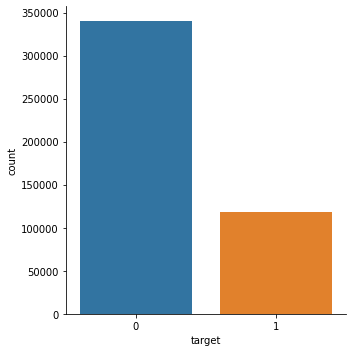

In [8]:
sns.catplot(x="target",kind="count",data=train_y)

# 3.2 Most Important Numeric predictor

Here I try to find which numeric variables have high correlation with target variable. This helps us to find the important variables. There are a total of 177 numerical features.

# 3.2.1 Correlation with target

In [9]:
numericalFeatures=[]
categoricalFeatures=['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

train_x.dtypes
for x in train_x.columns:
    if x != "customer_ID" and x!= "S_2" and x not in categoricalFeatures:
        numericalFeatures.append(x)

In [10]:
len(numericalFeatures)

177

We cannot yet find correlation between train lables and train features because they have different number of rows. So we must apply some join function to match the number of rows and join two tables.

In [11]:
train=pd.merge(left=train_y,right=train_x,on="customer_ID",how="outer")

In [12]:
train.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-03-09,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.0,0.004709,NaN,NaN,0,6,0.708906,0.170600,0,0.358587,0.525351,0.255736,-1,0.063902,0.059416,0.0,0.148698,4,0.008207,0,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0,1.0,0,0.161345,0.148266,2896,0.354596,0.152025,0.118075,0,0.158612,0.065728,0.018385,8,0.199617,0.308233,0.016361,15,0.091071,0,0,0,0,NaN,0.652984,0,-1,0,6,0.272008,0.008363,524,0.002644,0.009013,0,0,0.119403,0,4,0.050882,NaN,0.0,1,1,NaN,0.004327,0.0,NaN,0.007729,0.000272,0,0,0,-1,0.002271,0,0,0,0.002310,0,1,0.008033,1.0,0.084683,0,0,0.0,0,0,0,NaN,0,0,0,-1,0,0,NaN,1,0.002537,0,0,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1,1.004587,0.893734,-1,2,0.009968,0.004572,-1,1.008949,2,-1,0,NaN,-1,NaN,1.0,0.210060,0.676922,0,1,0.238250,0,5,0.232120,0.236266,0,0.702280,3,0,16,0,2,1,1.007819,1,0,NaN,0.0,0.0,NaN,0.004345,0,NaN,-1,-1,-1,-1,0,0,0.0,NaN,0,0.000610,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-04-07,0.936665,0,0.004923,1.000653,0.006151,0.126750,0.0,0.002714,NaN,NaN,0,5,0.712795,0.113239,0,0.353630,0.521311,0.223329,-1,0.065261,0.057744,0.0,0.149723,4,0.008373,0,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0,1.0,0,0.140951,0.143530,2896,0.326757,0.156201,0.118737,0,0.148459,0.093935,0.013035,8,0.151387,0.265026,0.017688,15,0.086805,0,0,0,0,NaN,0.647093,0,-1,0,6,0.188970,0.004030,524,0.004193,0.007842,0,0,0.140611,0,4,0.040469,NaN,0.0,1,1,NaN,0.004203,0.0,NaN,0.001864,0.000979,0,0,0,-1,0.009810,0,0,0,0.001327,0,1,0.000760,1.0,0.081843,0,0,0.0,0,0,0,NaN,0,0,0,-1,0,0,NaN,1,0.008427,0,0,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0.902135,0.136333,0.919876,0.975625,0.004561,0.786007,1,1.004118,0.906841,-1,2,0.003921,0.004654,-1,1.003205,2,-1,0,NaN,-1,NaN,1.0,0.184093,0.822281,0,1,0.247217,0,5,0.243532,0.241885,0,0.707017,3,0,16,0,2,1,1.004333,1,0,NaN,0.0,0.0,NaN,0.007495,0,NaN,-1,-1,-1,-1,0,0,0.0,NaN,0,0.005492,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-05-28,0.954180,3,0.021655,1.009672,0.006815,0.123977,0.0,0.009423,NaN,NaN,0,5,0.720884,0.060492,0,0.334650,0.524568,0.189424,-1,0.066982,0.056647,0.0,0.151955,4,0.009355,0,0.206629,0.738044,0.134073,NaN,0.048367,0.010077,0,1.0,0,0.112229,0.137014,3166,0.304124,0.153795,0.114534,0,0.139504,0.084757,0.056653,8,0.305883,0.212165,0.063955,15,0.094001,0,0,0,0,NaN,0.645819,0,-1,0,6,0.495308,0.006838,702,0.001337,0.006025,0,0,0.075868,0,4,0.047454,NaN,0.0,1,1,NaN,0.001782,0.0,NaN,0.005419,0.006149,0,0,0,-1,0.009362,0,0,0,0.007624,0,1,0.004056,1.0,0.081954,0,0,0.0,0,0,0,NaN,0,0,0,-1,0,0,NaN,1,0.007327,0,0,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0.939654,0.134938,0.958699,0.974067,0.011736,0.806840,1,1.009285,0.928719,-1,2,0.001264,0.019176,-1,1.000754,2,-1,0,NaN,-1,NaN,1.0,0.154837,0.853498,0,1,0.239867,0,5,0.240768,0.239710,0,0.704843,3,0,16,0,2,1,1.007831,1,0,NaN,0.0,0.0,NaN,0.009227,0,NaN,-1,-1,-1,-1,0,0,0.0,NaN,0,0.006986,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-06-13,0.960384,0,

In [13]:
train.shape

(5531451, 191)

In [14]:
del train_x
del train_y

Now we have only one table and the number of rows in predictor variable is equal to number of rows in feature variable.

Here we find the correlation between each columns. But, unfortunately we cannot vectorize it due to memory constrains as vectorizing it will require a lot of memory so we find correlation between two columns one at a time.

In [15]:
col=[]
col=numericalFeatures.copy()
col.append("target")

coefficient=[]
for x in col:
    temp=[]
    for y in col:
        temp.append(abs(train[x].corr(train[y])))
    coefficient.append(temp)

In [16]:
coefficient=pd.DataFrame(coefficient)
coefficient.index=col
coefficient.columns=col
coefficient

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_17,B_18,B_19,B_20,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_115,D_118,D_119,D_121,D_122,D_123,D_124,D_125,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
P_2,1.000000,0.191557,0.368003,0.545083,0.464548,0.334633,0.318198,0.454154,0.468156,0.299000,0.530547,0.450629,0.342805,0.063290,0.397034,0.159671,0.402161,0.760143,0.095604,0.050477,0.509976,0.394909,0.086473,0.322271,0.553486,0.307678,0.266480,0.399225,0.021150,0.444752,0.034917,0.341437,0.121486,0.212885,0.321568,0.364616,0.028899,0.178075,0.618840,0.157071,0.032812,0.255826,0.552946,0.050321,0.072040,0.227716,0.089888,0.451012,0.000666,0.056224,0.486856,0.086835,0.479702,0.340214,0.592867,0.412280,0.457527,0.003386,0.164754,0.111587,0.061889,0.010237,0.374980,0.321356,0.088060,0.340431,0.213045,0.498619,0.121436,0.278892,0.510356,0.549424,0.160523,0.136108,0.094195,0.433575,0.172247,0.015307,0.295238,0.189666,0.213138,0.315214,0.046892,0.062959,0.277036,0.077877,0.002185,0.331315,0.032680,0.026455,0.175932,0.270390,0.181249,0.064570,0.061723,0.202081,0.332118,0.118809,0.062929,0.014587,0.074672,0.056207,0.146235,0.013474,0.272715,0.071162,0.003604,0.106051,0.131119,0.105352,0.198545,0.124335,0.528504,0.195979,0.107490,0.010793,0.160810,0.177109,0.066052,0.081480,0.254802,0.073462,0.056677,0.102145,0.072363,0.108344,0.306165,0.038965,0.014878,0.090142,0.106844,0.055775,0.031378,0.096165,0.018012,0.367836,0.175486,0.306364,0.025430,0.022309,0.101040,0.025574,0.066597,0.297774,0.022841,0.044893,0.196531,0.263758,0.247554,0.246191,0.278023,0.233291,0.011421,0.026537,0.040324,0.257894,0.269623,0.208391,0.123138,0.142851,0.213668,0.213867,0.081429,0.140626,0.016321,0.178496,0.172247,0.162912,0.173334,0.161332,0.161014,0.114429,0.180169,0.106109,0.161052,0.006733,0.160457,0.610765
D_39,0.191557,1.000000,0.183361,0.194840,0.194521,0.052359,0.440707,0.173113,0.071277,0.046422,0.124539,0.169325,0.037497,0.045804,0.238750,0.031161,0.001865,0.172256,0.033756,0.019302,0.124983,0.005390,0.002976,0.006725,0.185825,0.031899,0.020366,0.111894,0.009428,0.138637,0.099095,0.177657,0.229967,0.290976,0.173129,0.079295,0.035999,0.151418,0.167894,0.018210,0.051913,0.158517,0.131892,0.009906,0.180489,0.047894,0.120307,0.099453,0.122611,0.093552,0.071796,0.185580,0.206226,0.120270,0.226726,0.091134,0.198769,0.027358,0.070790,0.152764,0.021045,0.005020,0.148104,0.085646,0.008184,0.080813,0.080477,0.128160,0.018387,0.028242,0.115364,0.146386,0.020484,0.082633,0.054310,0.033691,0.170130,0.076371,0.108588,0.061469,0.159643,0.035720,0.022027,0.025926,0.108165,0.006957,0.016099,0.107959,0.158029,0.024504,0.106102,0.181793,0.103037,0.054586,0.019682,0.091593,0.128429,0.010715,0.077705,0.067490,0.040286,0.035948,0.058210,0.003461,0.039671,0.083163,0.000431,0.075274,0.013135,0.028595,0.053359,0.037339,0.245373,0.089303,0.022070,0.008556,0.034862,0.034343,0.002153,0.013945,0.073253,0.049373,0.052121,0.123435,0.040589,0.136236,0.091090,0.037697,0.041957,0.066343,0.055930,0.021796,0.010543,0.069346,0.036053,0.181794,0.027079,0.043253,0.000005,0.003003,0.007135,0.041057,0.087593,0.303715,0.004291,0.032454,0.027077,0.027180,0.022050,0.021731,0.001397,0.011572,0.032282,0.055944,0.030707,0.016987,0.015443,0.037366,0.065038,0.020977,0.046041,0.050487,0.011022,0.037321,0.000449

P_2 and D_48 have greater effect on target variable than other variables as they have a correlational coefficient greater than 0.5. So, now we will look into this variables closely.

B_2, B_7, B_9, B_18, B_33, D_44, D_48, D_55, D_74, D_75, have a high correlation with P_2 variable. P_2, B_2, B_3, B_4, B_7, B_9, B_16, B_18, D_44, D_55, D_58, D_61, have a high correlation with D_48 variable. Thus there is a multicollinearity issue.

# 3.3.2 P_2 variable

We found that P_2 (a payment variable) is dependent on some balance variables and some delinquency variables which is quite expected as a person having enough balance in his/her bank would tend to pay back his credit and a person who have failed to pay back his/her debt in time often tends to avoid paying back the credit.

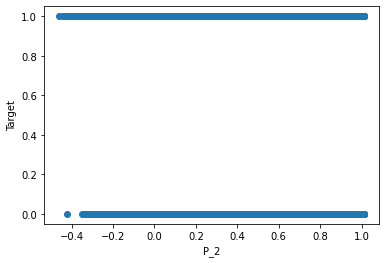

In [17]:
plt.scatter(train["P_2"],train["target"])
plt.xlabel("P_2")
plt.ylabel("Target")
plt.show()

# 3.3.3 D_48 Variable

We found that delinquency variables is dependent on balance variable which is quite obvious and it also depend on paymennt variable and other deliquency variables.

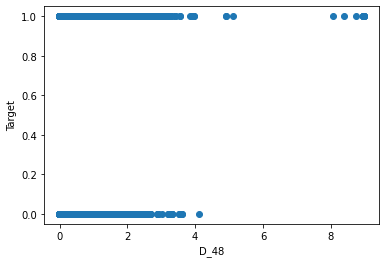

In [18]:
plt.scatter(train["D_48"],train["target"])
plt.xlabel("D_48")
plt.ylabel("Target")
plt.show()

The points right of 8 might be outliers.

# 4 Missing data, label encoding, and factorizing variables

# 4.1 Completeness of Data

First of all we will look for missing values.

In [19]:
train.isnull().sum().sort_values(ascending=False)

D_88           5525447
D_110          5500117
B_39           5497819
D_73           5475595
B_42           5459973
D_134          5336752
B_29           5150035
D_132          4988874
D_76           4908954
D_42           4740137
D_142          4587043
D_53           4084585
D_50           3142402
B_17           3137598
D_105          3021431
D_56           2990943
S_9            2933643
D_77           2513912
D_43           1658396
S_27           1400935
D_46           1211699
S_7            1020544
S_3            1020544
D_62            758161
D_48            718725
D_61            598052
P_3             301492
D_69            194473
D_55            184803
D_118           176716
D_121           176716
D_115           176716
D_119           176716
R_27            128703
D_131           101548
D_130           101548
D_104           101548
D_141           101548
D_128           101548
B_13             49519
P_2              45985
D_133            42716
D_144            40727
D_102      

Drop D_87, D_88, D_110, D_111, B_39, D_73, B_42, D_134, B_29, D_132, D_76, D_42, D_142, D_53, D_50, B_17, D_105, D_56 as they have null values more than 50%.

In [20]:
dropCols=["D_87", "D_88", "D_110", "D_111", "B_39", "D_73", "B_42", "D_134", "B_29", "D_132", "D_76", "D_42", "D_142", "D_53", "D_50", "B_17", "D_105", "D_56"]

for col in dropCols:
    if coefficient["target"][col]>=0.25:
        dropCols.remove(col)

D_42 and B_17 have correlation >=0.25 with target variable. So we will not drop them.

In [21]:
train.drop(labels=dropCols,axis=1,inplace=True)

In [22]:
del coefficient
del dropCols

We find that risk and spend variables effect the output least from correlation so we will handel them first.

* Spend variables to be handled - S_9, S_7, S_3, S_22, S_24, S_25, S_26, S_23

* Risk variables to be handled - R_27, R_12, R_14, R_7

* Balance variables to be handled - B_13, B_8, B_15, B_25, B_2, B_27, B_3, B_26, B_6, B_37, B_40, B_17

* Delinquency variables to be handled - D_77, D_43, D_46, D_62, D_48 (important variable), D_61, D_69, D_55, D_118, D_121, D_115, D_119, D_131, D_130, D_104, D_141, D_128, D_133, D_144, D_102, D_52, D_112, D_45, D_54, D_41, D_42

* Payment variables to be handled - P_3, P_2 (important variable)

# 4.2 Imputing missing values

# 4.2.1 Spend Variables

Here we look for correlation between the spend variables.

In [23]:
col=["S_9", "S_7", "S_3", "S_22", "S_24", "S_25", "S_26", "S_23"]

coefficient_S=[]
for x in col:
    temp=[]
    for y in col:
        temp.append(abs(train[x].corr(train[y])))
    coefficient_S.append(temp)

In [24]:
coefficient_S=pd.DataFrame(coefficient_S)
coefficient_S

,0,1,2,3,4,5,6,7
0,1.000000,0.039444,0.050414,0.001789,0.000695,0.013679,0.010283,0.005472
1,0.039444,1.000000,0.904635,0.030665,0.029921,0.082747,0.058458,0.033974
2,0.050414,0.904635,1.000000,0.016396,0.014730,0.089027,0.068159,0.032144
3,0.001789,0.030665,0.016396,1.000000,0.959324,0.058440,0.030985,0.048286
4,0.000695,0.029921,0.014730,0.959324,1.000000,0.062597,0.035143,0.063783
5,0.013679,0.082747,0.089027,0.058440,0.062597,1.000000,0.014796,0.164800
6,0.010283,0.058458,0.068159,0.030985,0.035143,0.014796,1.000000,0.001530
7,0.005472,0.033974,0.032144,0.048286,0.063783,0.164800,0.001530,1.000000


S_3 and S_7 are highly correlated.
S_22 and S_24 are highly correlated.

Thus one of them can be dropped.

In [25]:
del coefficient_S

In [26]:
train[(train["S_3"].isnull() & ~(train["S_7"].isnull())) | (~(train["S_3"].isnull()) & train["S_7"].isnull())]

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_51,B_9,R_3,D_52,P_3,B_10,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_143,D_144,D_145


There is not a single row there S_3 is null but S_7 is not null or S_3 is not null but S_7 is null. So, drop S_3 as S_3 has less correlation with target variable than S_7.

In [27]:
train[((~(train["S_22"].isnull()) & train["S_24"].isnull() | train["S_22"].isnull() & ~(train["S_24"].isnull())))][["S_22","S_24"]]

,S_22,S_24
20193,NaN,0.920115
24149,NaN,0.921454
44845,NaN,0.918856
77774,NaN,0.922945
91487,NaN,0.925572
100006,NaN,0.917156
104506,NaN,0.922911
112336,NaN,0.917854
138043,NaN,0.919360
148620,NaN,0.923245


So we should drop S_22.

In [28]:
train.drop(labels=["S_3","S_22"],axis=1,inplace=True)

In [29]:
train["S_7"].fillna(value=train["S_7"].mean(),inplace=True)
train["S_24"].fillna(value=train["S_24"].mean(),inplace=True)
train["S_9"].fillna(value=train["S_9"].mean(),inplace=True)
train["S_25"].fillna(value=train["S_25"].mean(),inplace=True)
train["S_26"].fillna(value=train["S_26"].mean(),inplace=True)
train["S_23"].fillna(value=train["S_23"].mean(),inplace=True)

Normalize S_8 columns

In [30]:
train["S_8"]=train["S_8"]/(train["S_8"].max()-train["S_8"].min())

# 4.2.2 Risk Variables

Find the correlation between risk variables.

In [31]:
col=["R_27", "R_12", "R_14", "R_7"]

coefficient_R=[]
for x in col:
    temp=[]
    for y in col:
        temp.append(abs(train[x].corr(train[y])))
    coefficient_R.append(temp)

In [32]:
coefficient_R=pd.DataFrame(coefficient_R)
coefficient_R

,0,1,2,3
0,1.000000,0.069391,0.010718,0.020143
1,0.069391,1.000000,0.022524,0.042354
2,0.010718,0.022524,1.000000,0.024288
3,0.020143,0.042354,0.024288,1.000000


In [33]:
del coefficient_R

The problem of multicolinearity does not exist in risk variables.

In [34]:
train["R_7"].value_counts()

0.000000     5386330
0.071429           3
0.855492           2
0.532221           2
0.339686           2
              ...   
23.899405          1
0.101322           1
0.652684           1
0.433338           1
0.164901           1
Name: R_7, Length: 144971, dtype: int64

R_7 has maximum values as 0. So we need to scale the larger values down.

In [35]:
train["R_7"]=train["R_7"]/train["R_7"].max()

In [36]:
train["R_12"].describe()

count    5.531395e+06
mean     9.743599e-01
std      1.529030e-01
min     -9.179347e-02
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: R_12, dtype: float64

No need to scale or standardize R_12

In [37]:
train["R_14"].value_counts()

0.000000    5453803
6.991232          2
1.297697          2
0.419175          2
9.856727          2
             ...   
6.963264          1
9.686559          1
9.594919          1
0.714634          1
0.383243          1
Name: R_14, Length: 77586, dtype: int64

R_14 has maximum values as 0. So we need to scale the larger values down.

In [38]:
train["R_14"]=train["R_14"]/train["R_14"].max()

Now we need to fill the null values.

In [39]:
train["R_7"].fillna(value=train["R_7"].median(),inplace=True)
train["R_7"].fillna(value=train["R_12"].mean(),inplace=True)
train["R_7"].fillna(value=train["R_14"].median(),inplace=True)
train["R_7"].fillna(value=train["R_27"].mean(),inplace=True)

# 4.2.3 Balance Variables

Find correlation between balance variables.

In [40]:
col=["B_13", "B_8", "B_15", "B_25", "B_2", "B_27", "B_3", "B_26", "B_6", "B_37", "B_40", "B_17"]

coefficient_B=[]
for x in col:
    temp=[]
    for y in col:
        temp.append(abs(train[x].corr(train[y])))
    coefficient_B.append(temp)

In [41]:
coefficient_B=pd.DataFrame(coefficient_B)
coefficient_B

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.050211,0.602355,0.093638,0.060703,0.018033,0.038203,0.143557,0.015218,0.026662,0.001729,0.056741
1,0.050211,1.000000,0.099720,0.023015,0.205668,0.000679,0.095843,0.013929,0.011410,0.128607,0.001509,0.084866
2,0.602355,0.099720,1.000000,0.033164,0.023018,0.031686,0.057185,0.261329,0.002301,0.017132,0.000014,0.057507
3,0.093638,0.023015,0.033164,1.000000,0.356308,0.000701,0.396393,0.008733,0.023424,0.513869,0.004426,0.238328
4,0.060703,0.205668,0.023018,0.356308,1.000000,0.002730,0.713539,0.032542,0.057863,0.634589,0.014785,0.683953
5,0.018033,0.000679,0.031686,0.000701,0.002730,1.000000,0.002228,0.056609,0.000665,0.000019,0.000351,0.000575
6,0.038203,0.095843,0.057185,0.396393,0.713539,0.002228,1.000000,0.010804,0.047737,0.733270,0.016039,0.469408
7,0.143557,0.013929,0.261329,0.008733,0.032542,0.056609,0.010804,1.000000,0.001233,0.003127,0.000021,0.007672
8,0.015218,0.011410,0.002301,0.023424,0.057863,0.000665,0.047737,0.001233,1.000000,0.041915,0.001957,0.068114
9,0.026662,0.128607,0.017132,0.513869,0.634589,0.000019,0.733270,0.003127,0.041915,1.000000,0.012436,0.397473


* B_13 and B_15 
* B_25 and B_37
* B_2 and B_3 and B_37
* B_2 and B_17
are correlated.

In [42]:
del coefficient_B

In [43]:
train[(train["B_25"].isnull() | train["B_37"].isnull() | train["B_2"].isnull() | train["B_3"].isnull() | train["B_17"].isnull()) & ~(train["B_25"].isnull() & train["B_37"].isnull() & train["B_2"].isnull() & train["B_3"].isnull() & train["B_17"].isnull())][["B_25","B_37","B_2","B_3","B_17"]]

,B_25,B_37,B_2,B_3,B_17
0,0.007729,0.004572,1.006838,0.004709,NaN
1,0.001864,0.004654,1.000653,0.002714,NaN
2,0.005419,0.019176,1.009672,0.009423,NaN
3,0.000646,0.011720,1.002700,0.005531,NaN
4,0.001833,0.017598,1.000727,0.009312,NaN
...,...,...,...,...,...
5531396,0.102211,0.011929,1.007224,0.007394,NaN
5531397,0.093370,0.012562,1.003230,0.009943,NaN
5531398,0.270649,0.027725,1.009866,0.005893,NaN
5531421,0.021401,0.010860,1.005270,0.008872,NaN


In [44]:
train["B_37"].describe()

count    5.531395e+06
mean     1.231896e-01
std      2.117770e-01
min     -7.604273e+00
25%      8.834880e-03
50%      3.114089e-02
75%      1.238671e-01
max      1.327812e+00
Name: B_37, dtype: float64

In [45]:
train["B_25"].describe()

count    5.524528e+06
mean     1.038704e-01
std      2.087053e-01
min     -1.125358e+01
25%      5.964626e-03
50%      1.985531e-02
75%      1.061590e-01
max      1.569976e+01
Name: B_25, dtype: float64

In [46]:
train.loc[train["B_37"].isnull() & ~train["B_25"].isnull(),"B_37"]=(train["B_37"].corr(train["B_25"])*train["B_37"].std()/train["B_25"].std())*(train.loc[train["B_37"].isnull() & ~train["B_25"].isnull(),"B_25"]-train["B_25"].mean())+train["B_37"].mean()
train.loc[~train["B_37"].isnull() & train["B_25"].isnull(),"B_25"]=(train["B_37"].corr(train["B_25"])*train["B_25"].std()/train["B_37"].std())*(train.loc[~train["B_37"].isnull() & train["B_25"].isnull(),"B_37"]-train["B_37"].mean())+train["B_25"].mean()

In [47]:
train["B_37"].fillna(train["B_37"].mean(),inplace=True)
train["B_25"].fillna(train["B_25"].mean(),inplace=True)

Column B_37 and B_25 is free from any null values.

In [48]:
train[(~train["B_13"].isnull() & train["B_15"].isnull()) | (train["B_13"].isnull() & ~train["B_15"].isnull()) ][["B_13","B_15"]]

,B_13,B_15
130,NaN,0.000618
250,NaN,0.009247
251,NaN,0.004155
432,NaN,0.009293
448,NaN,0.009118
...,...,...
5530703,NaN,0.001304
5530704,NaN,0.007552
5530895,NaN,0.053361
5531263,NaN,0.004964


In [49]:
train["B_13"].describe()

count    5.481932e+06
mean     1.007155e-01
std      5.593840e-01
min      1.905850e-08
25%      9.255422e-03
50%      2.931426e-02
75%      8.941486e-02
max      2.761778e+02
Name: B_13, dtype: float64

In [50]:
train["B_15"].describe()

count    5.524528e+06
mean     5.280756e-02
std      3.005498e-01
min     -1.000805e+01
25%      3.139858e-03
50%      6.234544e-03
75%      9.289617e-03
max      6.503743e+01
Name: B_15, dtype: float64

We will use correlational coefficient and the know values to predict the unknown values.

In [51]:
train.loc[train["B_13"].isnull() & ~train["B_15"].isnull(),"B_13"]=(train["B_13"].corr(train["B_15"])*train["B_13"].std()/train["B_15"].std())*(train.loc[train["B_13"].isnull() & ~train["B_15"].isnull(),"B_15"]-train["B_15"].mean())+train["B_13"].mean()
train.loc[~train["B_13"].isnull() & train["B_15"].isnull(),"B_15"]=(train["B_13"].corr(train["B_15"])*train["B_15"].std()/train["B_13"].std())*(train.loc[~train["B_13"].isnull() & train["B_15"].isnull(),"B_13"]-train["B_13"].mean())+train["B_15"].mean()

Fill the remaning null values.

In [52]:
train["B_13"].fillna(train["B_13"].mean(),inplace=True)
train["B_15"].fillna(train["B_15"].mean(),inplace=True)

In [53]:
train["B_13"]=train["B_13"]/(train["B_13"].max()-train["B_13"].min())

Thus B_13 and B_15 is handled.

Calculating Values of B_2 and B_3 from B_37

In [54]:
train.loc[train["B_2"].isnull() & ~train["B_37"].isnull(),"B_2"]=(train["B_2"].corr(train["B_37"])*train["B_2"].std()/train["B_37"].std())*(train.loc[train["B_2"].isnull() & ~train["B_37"].isnull(),"B_37"]-train["B_37"].mean())+train["B_2"].mean()
train.loc[train["B_3"].isnull() & ~train["B_37"].isnull(),"B_3"]=(train["B_3"].corr(train["B_37"])*train["B_3"].std()/train["B_37"].std())*(train.loc[train["B_3"].isnull() & ~train["B_37"].isnull(),"B_37"]-train["B_37"].mean())+train["B_3"].mean()

Calculating B_17 from B_2

In [55]:
train.loc[train["B_17"].isnull() & ~train["B_2"].isnull(),"B_17"]=(train["B_17"].corr(train["B_2"])*train["B_2"].std()/train["B_2"].std())*(train.loc[train["B_17"].isnull() & ~train["B_2"].isnull(),"B_2"]-train["B_2"].mean())+train["B_2"].mean()

# 4.2.4 Payment Variables

In [56]:
train["P_2"].describe()

count    5.485466e+06
mean     6.563343e-01
std      2.446494e-01
min     -4.589548e-01
25%      4.803307e-01
50%      6.942950e-01
75%      8.648159e-01
max      1.010000e+00
Name: P_2, dtype: float64

In [57]:
train["P_2"].fillna(value=train["P_2"].mean(),inplace=True)

P_2 variable is handled

In [58]:
train["P_3"].describe()

count    5.229959e+06
mean     6.012886e-01
std      1.707992e-01
min     -1.519690e+00
25%      5.408657e-01
50%      6.183025e-01
75%      6.838264e-01
max      2.428051e+00
Name: P_3, dtype: float64

In [59]:
train["P_3"].fillna(value=train["P_3"].mean(),inplace=True)

P_3 column is free of any null values

# 4.2.5 Delinquency Variables

In [60]:
train.isnull().sum().sort_values(ascending=False)

D_42           4740137
D_77           2513912
D_43           1658396
S_27           1400935
D_46           1211699
D_62            758161
D_48            718725
D_61            598052
D_69            194473
D_55            184803
D_119           176716
D_115           176716
D_118           176716
D_121           176716
R_27            128703
D_141           101548
D_104           101548
D_128           101548
D_131           101548
D_130           101548
D_133            42716
D_144            40727
D_102            40655
D_52             29563
B_8              22268
D_112             2650
D_45              2017
B_26              2016
D_41              2016
D_54              2016
B_27              2016
B_6                233
R_12                56
B_40                53
R_14                 1
R_21                 0
S_18                 0
D_84                 0
S_23                 0
R_16                 0
D_96                 0
R_25                 0
R_24                 0
D_94       

In [61]:
train.drop(labels=["D_42","D_77"],axis=1,inplace=True)

In [62]:
train.loc[train["D_43"].isnull() & ~train["R_3"].isnull(),"D_43"]=(train["D_43"].corr(train["R_3"])*train["R_3"].std()/train["R_3"].std())*(train.loc[train["D_43"].isnull() & ~train["R_3"].isnull(),"R_3"]-train["R_3"].mean())+train["R_3"].mean()

In [63]:
train["D_46"].describe()

count    4.319752e+06
mean     4.754784e-01
std      1.698931e-01
min     -1.728934e+01
25%      4.251277e-01
50%      4.596702e-01
75%      5.174066e-01
max      1.631990e+01
Name: D_46, dtype: float64

In [64]:
train["D_46"].fillna(value=train["D_46"].mean(),inplace=True)

In [65]:
train["D_62"].describe()

count    4.773290e+06
mean     1.906619e-01
std      2.302575e-01
min     -2.822135e-03
25%      3.101255e-02
50%      9.443575e-02
75%      2.844872e-01
max      1.110095e+01
Name: D_62, dtype: float64

In [66]:
train["D_62"].fillna(value=train["D_62"].mean(),inplace=True)

In [67]:
train["D_48"].describe()

count    4.812726e+06
mean     3.816244e-01
std      3.264793e-01
min     -9.615277e-03
25%      8.100685e-02
50%      2.861716e-01
75%      6.693663e-01
max      8.971425e+00
Name: D_48, dtype: float64

In [68]:
train.loc[train["D_48"].isnull() & ~train["P_2"].isnull(),"D_48"]=(train["D_48"].corr(train["P_2"])*train["P_2"].std()/train["P_2"].std())*(train.loc[train["D_48"].isnull() & ~train["P_2"].isnull(),"P_2"]-train["P_2"].mean())+train["P_2"].mean()

In [69]:
train["D_61"].describe()

count    4.933399e+06
mean     4.296289e-01
std      5.245269e-01
min     -9.259018e-03
25%      9.247558e-02
50%      3.722664e-01
75%      7.745240e-01
max      8.685154e+02
Name: D_61, dtype: float64

In [70]:
train["D_61"]=train["D_61"]/(train["D_61"].max()-train["D_61"].min())

In [71]:
train["D_61"].fillna(value=train["D_61"].mean(),inplace=True)

In [72]:
train["D_69"].describe()

count    5.336978e+06
mean     1.540407e-01
std      1.600965e+01
min      6.051601e-09
25%      2.585181e-03
50%      5.166080e-03
75%      7.749850e-03
max      1.300091e+04
Name: D_69, dtype: float64

In [73]:
train["D_69"]=train["D_69"]/(train["D_69"].max()-train["D_69"].min())

In [74]:
train["D_69"].describe()

count    5.336978e+06
mean     1.184846e-05
std      1.231426e-03
min      4.654752e-13
25%      1.988461e-07
50%      3.973630e-07
75%      5.961006e-07
max      1.000000e+00
Name: D_69, dtype: float64

In [75]:
train["D_69"].fillna(value=train["D_69"].mean(),inplace=True)

In [76]:
train["D_55"].describe()

count    5.346648e+06
mean     2.980905e-01
std      2.887424e-01
min      2.353218e-08
25%      5.701689e-02
50%      1.816685e-01
75%      5.012074e-01
max      2.767759e+00
Name: D_55, dtype: float64

In [77]:
train["D_55"].fillna(value=train["D_55"].mean(),inplace=True)

In [78]:
train["D_118"].describe()

count    5.354735e+06
mean     2.835119e-01
std      2.559502e-01
min      2.551906e-08
25%      6.241067e-02
50%      2.204558e-01
75%      4.417185e-01
max      1.970907e+00
Name: D_118, dtype: float64

In [79]:
train["D_118"].fillna(value=train["D_118"].mean(),inplace=True)

In [80]:
train["D_121"].describe()

count    5.354735e+06
mean     5.322440e-01
std      2.338079e-01
min     -3.207547e-02
25%      3.563471e-01
50%      5.953797e-01
75%      7.148844e-01
max      1.791115e+00
Name: D_121, dtype: float64

In [81]:
train["D_121"].fillna(value=train["D_121"].mean(),inplace=True)

In [82]:
train["D_115"].describe()

count    5.354735e+06
mean     2.781286e-01
std      2.562120e-01
min      2.228054e-07
25%      6.258397e-02
50%      1.991381e-01
75%      4.340722e-01
max      1.999540e+00
Name: D_115, dtype: float64

In [83]:
train["D_115"].fillna(value=train["D_115"].mean(),inplace=True)

In [84]:
train["D_119"].describe()

count    5.354735e+06
mean     2.794083e-01
std      2.564670e-01
min      7.076709e-08
25%      5.837902e-02
50%      2.133946e-01
75%      4.372384e-01
max      1.977007e+00
Name: D_119, dtype: float64

In [85]:
train["D_119"].fillna(value=train["D_119"].mean(),inplace=True)

In [86]:
train["D_131"].describe()

count    5.429903e+06
mean     9.887607e-02
std      2.968188e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.491624e+00
Name: D_131, dtype: float64

In [87]:
train["D_131"].value_counts()

0.000000    4887320
0.984557          9
0.977977          9
0.981782          9
0.979719          9
             ...   
1.010829          1
1.018996          1
1.021163          1
0.987407          1
1.006120          1
Name: D_131, Length: 357435, dtype: int64

In [88]:
train["D_131"].fillna(value=0,inplace=True)

In [89]:
train["D_130"].describe()

count    5.429903e+06
mean     1.976452e-01
std      3.994732e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.028044e+00
Name: D_130, dtype: float64

In [90]:
train["D_130"].value_counts()

0.000000    4362088
1.007362         31
1.006384         31
1.000537         29
1.005245         29
             ...   
1.010021          1
1.010082          1
1.010250          1
1.010871          1
1.010131          1
Name: D_130, Length: 87229, dtype: int64

In [91]:
train["D_130"].fillna(value=0,inplace=True)

In [92]:
train["D_104"].describe()

count    5.429903e+06
mean     4.479380e-01
std      4.832307e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      9.644330e-01
max      1.302976e+00
Name: D_104, dtype: float64

In [93]:
train["D_104"].value_counts()

0.000000    2919859
0.963789         17
0.958540         17
0.957017         16
0.957959         16
             ...   
0.985558          1
0.969633          1
0.993444          1
0.997511          1
0.987907          1
Name: D_104, Length: 850543, dtype: int64

In [94]:
train["D_104"].fillna(value=0,inplace=True)

In [95]:
train["D_141"].describe()

count    5.429903e+06
mean     1.603911e-01
std      3.501590e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.339910e+00
Name: D_141, dtype: float64

In [96]:
train["D_141"].value_counts()

0.000000    4485485
0.865112          7
0.872171          7
0.867756          7
0.865483          7
             ...   
0.989010          1
0.989994          1
0.988558          1
0.986803          1
0.941114          1
Name: D_141, Length: 779126, dtype: int64

In [97]:
train["D_141"].fillna(value=0,inplace=True)

In [98]:
train["D_128"].describe()

count    5.429903e+06
mean     5.820190e-01
std      4.956147e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000419e+00
75%      1.004735e+00
max      1.023472e+00
Name: D_128, dtype: float64

In [99]:
train["D_128"].value_counts()

0.000000    2282338
1.004509         68
1.007754         66
1.007222         66
1.003173         66
             ...   
1.009099          1
1.009732          1
1.009186          1
1.009789          1
1.009771          1
Name: D_128, Length: 100748, dtype: int64

In [100]:
train["D_128"].fillna(value=0,inplace=True)

In [101]:
train["D_133"].describe()

count    5.488735e+06
mean     4.614353e-02
std      1.720901e-01
min      6.380582e-10
25%      2.718821e-03
50%      5.439861e-03
75%      8.163446e-03
max      1.510000e+00
Name: D_133, dtype: float64

In [102]:
train["D_133"].fillna(value=train["D_133"].mean(),inplace=True)

In [103]:
train["D_144"].describe()

count    5.490724e+06
mean     5.238953e-02
std      1.825135e-01
min      2.500991e-09
25%      2.752895e-03
50%      5.508129e-03
75%      8.260448e-03
max      1.343331e+00
Name: D_144, dtype: float64

In [104]:
train["D_144"].fillna(value=train["D_144"].mean(),inplace=True)

In [105]:
train["D_102"].describe()

count    5.490796e+06
mean     1.898366e-01
std      2.748047e-01
min      9.620587e-10
25%      4.453618e-03
50%      8.898508e-03
75%      3.278337e-01
max      1.089998e+00
Name: D_102, dtype: float64

In [106]:
train["D_102"].fillna(value=train["D_102"].mean(),inplace=True)

In [107]:
train["D_52"].describe()

count    5.501888e+06
mean     1.800505e-01
std      1.738649e-01
min     -7.083110e-03
25%      7.387472e-02
50%      1.444321e-01
75%      2.331460e-01
max      1.010000e+00
Name: D_52, dtype: float64

In [108]:
train["D_52"].fillna(value=train["D_52"].mean(),inplace=True)

In [109]:
train["D_112"].describe()

count    5.528801e+06
mean     8.368673e-01
std      3.675444e-01
min      4.344640e-08
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: D_112, dtype: float64

In [110]:
train["D_112"].value_counts()

1.000000    4618859
0.008968          4
0.008632          4
0.008664          3
0.008673          3
             ...   
0.001756          1
0.010011          1
0.011724          1
0.009233          1
0.024867          1
Name: D_112, Length: 894388, dtype: int64

In [111]:
train["D_112"].fillna(value=1,inplace=True)

In [112]:
train["D_45"].describe()

count    5.529434e+06
mean     2.521866e-01
std      2.426829e-01
min      1.563241e-08
25%      5.462902e-02
50%      1.808053e-01
75%      3.733219e-01
max      1.610002e+00
Name: D_45, dtype: float64

In [113]:
train["D_45"].fillna(value=train["D_45"].mean(),inplace=True)

In [114]:
train["D_54"].describe()

count    5.529435e+06
mean     9.797422e-01
std      1.403702e-01
min     -2.005767e-03
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: D_54, dtype: float64

In [115]:
train["D_54"].value_counts()

1.000000    5416625
0.020380          2
0.006087          2
0.016527          2
0.011839          2
             ...   
0.018780          1
0.013763          1
0.010936          1
0.004019          1
0.007612          1
Name: D_54, Length: 112645, dtype: int64

In [116]:
train["D_54"].fillna(value=1,inplace=True)

In [117]:
train["D_41"].describe()

count    5.529435e+06
mean     5.543458e-02
std      2.037066e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.988807e+00
Name: D_41, dtype: float64

In [118]:
train["D_41"].value_counts()

0.000000    4811300
0.353426          4
0.588803          3
0.263626          3
0.362536          3
             ...   
0.085621          1
0.079717          1
0.342849          1
0.426314          1
0.172512          1
Name: D_41, Length: 710177, dtype: int64

In [119]:
train["D_41"].fillna(value=0,inplace=True)

# 4.2.6 Remaining Unhandled Variables

Check for unhandled columns.

In [120]:
train.isnull().sum().sort_values(ascending=False)

S_27           1400935
R_27            128703
B_8              22268
B_27              2016
B_26              2016
B_6                233
R_12                56
B_40                53
R_14                 1
R_24                 0
R_23                 0
D_91                 0
D_92                 0
D_93                 0
D_94                 0
D_96                 0
R_25                 0
D_89                 0
S_23                 0
S_24                 0
S_25                 0
S_26                 0
D_102                0
D_103                0
R_22                 0
R_20                 0
B_33                 0
R_21                 0
B_28                 0
R_13                 0
D_83                 0
R_15                 0
D_84                 0
R_16                 0
B_30                 0
S_18                 0
D_86                 0
R_17                 0
R_18                 0
B_31                 0
S_19                 0
R_19                 0
B_32                 0
S_20       

In [121]:
train["S_27"].describe()

count    4.130516e+06
mean     2.779785e-01
std      3.250327e-01
min      4.417077e-10
25%      6.364579e-03
50%      2.905143e-01
75%      4.477965e-01
max      5.456269e+00
Name: S_27, dtype: float64

In [122]:
train["S_27"].fillna(value=train["S_27"].mean(),inplace=True)

In [123]:
train["R_27"].describe()

count    5.402748e+06
mean     8.936940e-01
std      3.123073e-01
min     -2.571099e-02
25%      1.001545e+00
50%      1.004365e+00
75%      1.007182e+00
max      1.010000e+00
Name: R_27, dtype: float64

In [124]:
train["R_27"].fillna(value=train["R_27"].mean(),inplace=True)

In [125]:
train["B_8"].describe()

count    5.509183e+06
mean     4.478102e-01
std      4.994213e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.004175e+00
max      1.019079e+00
Name: B_8, dtype: float64

In [126]:
train["B_8"].value_counts()

0.000000    3053857
1.006499         56
1.000806         55
1.004937         52
1.008118         51
             ...   
1.009904          1
1.010102          1
1.009941          1
1.009972          1
1.010105          1
Name: B_8, Length: 88734, dtype: int64

In [127]:
train["R_27"].fillna(value=0,inplace=True)

In [128]:
train["B_27"].fillna(value=train["B_27"].mean(),inplace=True)
train["B_26"].fillna(value=train["B_26"].mean(),inplace=True)
train["B_6"].fillna(value=train["B_6"].mean(),inplace=True)
train["B_8"].fillna(value=train["B_8"].mean(),inplace=True)
train["B_40"].fillna(value=train["B_40"].mean(),inplace=True)
train["R_12"].fillna(value=train["R_12"].mean(),inplace=True)
train["R_14"].fillna(value=train["R_14"].mean(),inplace=True)

#  4.3 Label encoding/factorizing the remaining character variables

First of all we need to convert date into factors.

In [129]:
train.groupby(by="customer_ID")
train

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,D_41,B_3,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_51,B_9,R_3,D_52,P_3,B_10,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-03-09,0.938469,0,0.008724,1.006838,0.009228,0.0,0.004709,0.353440,0,6,0.708906,0.170600,0,0.358587,0.525351,0.255736,-1,0.063902,0.059416,0.0,4,0.008207,0,0.207334,0.736463,0.096219,0.023381,0.002768,0,1.0,0,0.161345,0.148266,0.748901,0.354596,0.000423,0,0.158612,0.065728,0.018385,8,0.199617,0.000355,0.016361,15,0.091071,0,0,0,0,0.357853,0.652984,0,-1,0,6,0.272008,0.008363,524,0.002644,6.932822e-07,0,0,0.119403,0,4,0.050882,0.0,1,1,0.004327,0.0,0.007729,0.000272,0,0,0,-1,0.002271,0,0,0,0.002310,0,1,0.008033,1.0,0.084683,0,0,0.0,0,0,0,0,0,0,0,0,1,0.002537,0,0,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0.135561,0.911191,0.974539,0.001243,0.766688,1,1.004587,-1,2,0.009968,0.004572,-1,1.008949,2,-1,0,1.0,0.210060,0.676922,0,1,0.238250,0,5,0.232120,0.236266,0,0.702280,3,0,16,0,2,1,1.007819,1,0,0.0,0.0,0.004345,0,-1,-1,-1,-1,0,0,0.0,0,0.000610,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-04-07,0.936665,0,0.004923,1.000653,0.006151,0.0,0.002714,0.353440,0,5,0.712795,0.113239,0,0.353630,0.521311,0.223329,-1,0.065261,0.057744,0.0,4,0.008373,0,0.202778,0.720886,0.099804,0.030599,0.002749,0,1.0,0,0.140951,0.143530,0.748901,0.326757,0.000426,0,0.148459,0.093935,0.013035,8,0.151387,0.000305,0.017688,15,0.086805,0,0,0,0,0.362083,0.647093,0,-1,0,6,0.188970,0.004030,524,0.004193,6.032182e-07,0,0,0.140611,0,4,0.040469,0.0,1,1,0.004203,0.0,0.001864,0.000979,0,0,0,-1,0.009810,0,0,0,0.001327,0,1,0.000760,1.0,0.081843,0,0,0.0,0,0,0,0,0,0,0,0,1,0.008427,0,0,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0.136333,0.919876,0.975625,0.004561,0.786007,1,1.004118,-1,2,0.003921,0.004654,-1,1.003205,2,-1,0,1.0,0.184093,0.822281,0,1,0.247217,0,5,0.243532,0.241885,0,0.707017,3,0,16,0,2,1,1.004333,1,0,0.0,0.0,0.007495,0,-1,-1,-1,-1,0,0,0.0,0,0.005492,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-05-28,0.954180,3,0.021655,1.009672,0.006815,0.0,0.009423,0.353440,0,5,0.720884,0.060492,0,0.334650,0.524568,0.189424,-1,0.066982,0.056647,0.0,4,0.009355,0,0.206629,0.738044,0.134073,0.048367,0.010077,0,1.0,0,0.112229,0.137014,0.818723,0.304124,0.000411,0,0.139504,0.084757,0.056653,8,0.305883,0.000244,0.063955,15,0.094001,0,0,0,0,0.355915,0.645819,0,-1,0,6,0.495308,0.006838,702,0.001337,4.634500e-07,0,0,0.075868,0,4,0.047454,0.0,1,1,0.001782,0.0,0.005419,0.006149,0,0,0,-1,0.009362,0,0,0,0.007624,0,1,0.004056,1.0,0.081954,0,0,0.0,0,0,0,0,0,0,0,0,1,0.007327,0,0,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0.134938,0.958699,0.974067,0.011736,0.806840,1,1.009285,-1,2,0.001264,0.019176,-1,1.000754,2,-1,0,1.0,0.154837,0.853498,0,1,0.239867,0,5,0.240768,0.239710,0,0.704843,3,0,16,0,2,1,1.007831,1,0,0.0,0.0,0.009227,0,-1,-1,-1,-1,0,0,0.0,0,0.006986,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-06-13,0.960384,0,0.013683,1.002700,0.001373,0.0,0.005531,0.353440,0,4,0.723997,0.166782,0,0.323271,0.530929,0.135586,-1,0.083720,0.049253,0.0,4,0.006782,0,0.208214,0.741813,0.134437,0.030063,0.009667,0,1.0,0,0.102838,0.129017,0.573571,0.275055,0.000433,0,0.138100,0.048382,0.012498,8,0.273553,0.000235,0.022732,15,0.094854,0,0,0,0,0.360683,0.654358,0,-1,0,6,0.508670,0.008183,5

Remove the day from the S_2 columns as it is of not much significance.

I think recent transaction indicates lower probability of defaulting (Contradictory with our finding from target variable). So I factories the date column.

In [130]:
train["S_2"]=train["S_2"].str.slice(start=0,stop=7)
mapping={"2017-03":0,"2017-04":1,"2017-05":2,"2017-06":3,"2017-07":4,"2017-08":5,"2017-09":6,"2017-10":7,"2017-11":8,"2017-12":9,"2018-01":10,"2018-02":11,"2018-03":12}
train=train.replace({"S_2":mapping})
train["S_2"]

0           0
1           1
2           2
3           3
4           4
           ..
5531446     8
5531447     9
5531448    10
5531449    11
5531450    12
Name: S_2, Length: 5531451, dtype: int64

In [131]:
train["S_2"].value_counts()

12    458913
11    452781
10    446255
9     438910
8     434268
7     430292
6     425455
5     421099
4     415602
3     410384
1     401556
2     400306
0     395630
Name: S_2, dtype: int64

Thus online use of credit card increased over time.

In [132]:
train.drop(labels="customer_ID",axis=1,inplace=True)

The categorical features are the followings ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [133]:
columns=['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
for col in columns:
    print(train[col].value_counts())

 0    4710663
 1     763955
 2      54817
-1       2016
Name: B_30, dtype: int64
 2    1953232
 3    1255315
 1    1160047
 5     444856
 4     294917
 7     259028
 6     162040
-1       2016
Name: B_38, dtype: int64
 1    3316478
 0    2038257
-1     176716
Name: D_114, dtype: int64
 0    5348109
-1     176716
 1       6626
Name: D_116, dtype: int64
 0    1456084
 4    1166400
 5    1138666
 3     666808
 6     459290
 7     344520
-1     176716
 2     122967
Name: D_117, dtype: int64
 0    4729723
 1     625012
-1     176716
Name: D_120, dtype: int64
 2    4262414
 1     891323
 0     260898
-1     116816
Name: D_126, dtype: int64
3    4119621
0     930133
4     438390
1      25786
2      10556
5       6965
Name: D_63, dtype: int64
 0    2913244
 3    1523448
 2     840112
-1     217442
 1      37205
Name: D_64, dtype: int64
-1    4908097
 1     617066
 0       6288
Name: D_66, dtype: int64
 6    2782455
 5    1201706
 3     484442
 4     477187
 2     220111
-1     216503
 1     13

In [134]:
train["S_2"].value_counts()

12    458913
11    452781
10    446255
9     438910
8     434268
7     430292
6     425455
5     421099
4     415602
3     410384
1     401556
2     400306
0     395630
Name: S_2, dtype: int64

Here I have used target encoder for categorical columns.

In [135]:
cols=['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68','S_2']
encoder=TargetEncoder()
for c in cols:
    train[c]=train[c].astype('category')
    train[c] = encoder.fit_transform(train[c], train["target"])

/opt/conda/lib/python3.7/site-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [136]:
train["S_2"].value_counts()

0.258934    458913
0.257893    452781
0.257176    446255
0.256362    438910
0.254698    434268
0.252840    430292
0.250988    425455
0.248830    421099
0.245882    415602
0.242539    410384
0.236346    401556
0.238807    400306
0.232017    395630
Name: S_2, dtype: int64

<AxesSubplot:>

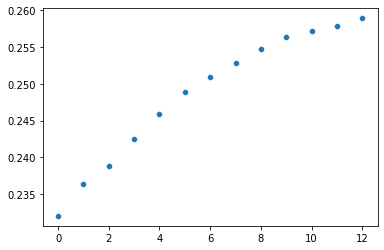

In [137]:
sns.scatterplot(x=np.linspace(start=0,stop=12,num=13),y=train["S_2"].unique())

Thus we can notice that persons who have made recent transactions have a higher probability of defaulting than others.

We will use the correlation ,standard deviation and mean to derive the values for the lables present in the test set.

In [138]:
np.corrcoef(np.linspace(start=0,stop=12,num=13),y=train["S_2"].unique())

array([[1.        , 0.97450656],
       [0.97450656, 1.        ]])

In [139]:
train.shape

(5531451, 170)

In [140]:
train.head(10)

,target,S_2,P_2,D_39,B_1,B_2,R_1,D_41,B_3,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_51,B_9,R_3,D_52,P_3,B_10,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_143,D_144,D_145
0,0,0.232017,0.938469,0,0.008724,1.006838,0.009228,0.0,0.004709,0.35344,0,6,0.708906,0.170600,0,0.358587,0.525351,0.255736,-1,0.063902,0.059416,0.0,4,0.008207,0,0.207334,0.736463,0.096219,0.023381,0.002768,0,1.0,0,0.161345,0.148266,0.748901,0.354596,0.000423,0,0.158612,0.065728,0.018385,8,0.199617,0.000355,0.016361,15,0.091071,0.169865,0.169255,0,0,0.357853,0.652984,0,0.257171,0,0.174952,0.272008,0.008363,524,0.002644,6.932822e-07,0,0,0.119403,0,4,0.050882,0.0,1,1,0.004327,0.0,0.007729,0.000272,0,0,0,-1,0.002271,0,0,0,0.002310,0,1,0.008033,1.0,0.084683,0,0,0.0,0,0,0,0.183402,0,0,0,0,1,0.002537,0,0,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0.135561,0.911191,0.974539,0.001243,0.766688,1,1.004587,-1,2,0.009968,0.004572,-1,1.008949,0.063306,-1,0,1.0,0.210060,0.676922,0,0.179497,0.238250,0.242413,0.1737,0.232120,0.236266,0.212713,0.702280,3,0,16,0,0.232809,1,1.007819,1,0,0.0,0.0,0.004345,0,-1,-1,-1,-1,0,0,0.0,0,0.000610,0
1,0,0.236346,0.936665,0,0.004923,1.000653,0.006151,0.0,0.002714,0.35344,0,5,0.712795,0.113239,0,0.353630,0.521311,0.223329,-1,0.065261,0.057744,0.0,4,0.008373,0,0.202778,0.720886,0.099804,0.030599,0.002749,0,1.0,0,0.140951,0.143530,0.748901,0.326757,0.000426,0,0.148459,0.093935,0.013035,8,0.151387,0.000305,0.017688,15,0.086805,0.169865,0.169255,0,0,0.362083,0.647093,0,0.257171,0,0.174952,0.188970,0.004030,524,0.004193,6.032182e-07,0,0,0.140611,0,4,0.040469,0.0,1,1,0.004203,0.0,0.001864,0.000979,0,0,0,-1,0.009810,0,0,0,0.001327,0,1,0.000760,1.0,0.081843,0,0,0.0,0,0,0,0.183402,0,0,0,0,1,0.008427,0,0,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0.136333,0.919876,0.975625,0.004561,0.786007,1,1.004118,-1,2,0.003921,0.004654,-1,1.003205,0.063306,-1,0,1.0,0.184093,0.822281,0,0.179497,0.247217,0.242413,0.1737,0.243532,0.241885,0.212713,0.707017,3,0,16,0,0.232809,1,1.004333,1,0,0.0,0.0,0.007495,0,-1,-1,-1,-1,0,0,0.0,0,0.005492,0
2,0,0.238807,0.954180,3,0.021655,1.009672,0.006815,0.0,0.009423,0.35344,0,5,0.720884,0.060492,0,0.334650,0.524568,0.189424,-1,0.066982,0.056647,0.0,4,0.009355,0,0.206629,0.738044,0.134073,0.048367,0.010077,0,1.0,0,0.112229,0.137014,0.818723,0.304124,0.000411,0,0.139504,0.084757,0.056653,8,0.305883,0.000244,0.063955,15,0.094001,0.169865,0.169255,0,0,0.355915,0.645819,0,0.257171,0,0.174952,0.495308,0.006838,702,0.001337,4.634500e-07,0,0,0.075868,0,4,0.047454,0.0,1,1,0.001782,0.0,0.005419,0.006149,0,0,0,-1,0.009362,0,0,0,0.007624,0,1,0.004056,1.0,0.081954,0,0,0.0,0,0,0,0.183402,0,0,0,0,1,0.007327,0,0,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0.134938,0.958699,0.974067,0.011736,0.806840,1,1.009285,-1,2,0.001264,0.019176,-1,1.000754,0.063306,-1,0,1.0,0.154837,0.853498,0,0.179497,0.239867,0.242413,0.1737,0.240768,0.239710,0.212713,0.704843,3,0,16,0,0.232809,1,1.007831,1,0,0.0,0.0,0.009227,0,-1,-1,-1,-1,0,0,0.0,0,0.006986,0
3,0,0.242539,0.960384,0,0.013683,1.002700,0.001373,0.0,0.005531,0.35344,0,4,0.723997,0.166782,0,0.323271,0.530929,0.135586,-1,0.083720,0.049253,0.0,4,0.006782,0,0.208214,0.741813,0.134437,0.030063,0.009667,0,1.0,0,0.102838,0.129017,0.573571,0.275055,0.000433,0,0.138100,0.048382,0.012498,8,0.273553,0.000235,0.022732,15,0.094854,0.169865,0.169255,0,0,0.360683,0.654358,0,0.257171,0,0.1

As there was very less space available to me. I use garbage collector to free up some space.

In [141]:
import gc
gc.collect()

6176

# 5 Preparing Data for modelling

# 5.1 We will normalise all the numerical columns

Here I normalize the numerical columns and change the data type to save some space. Here we have used min max normalizer.

In [142]:
for col in train.columns:
    if col not in ['customer_ID', 'target', 'B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68','S_2']:
        train[col]=train[col]/(train[col].max()-train[col].min())
    if col not in ['customer_ID', 'target']:
        train[col]=train[col].astype("float16")
train["target"]=train["target"].astype("int8")

Here I check the size of dataframe to be downloaded.

Here we don't need to handle the skewness of the data as neural network can handle them automatically.(https://www.researchgate.net/publication/334309178_The_relationship_between_data_skewness_and_accuracy_of_Artificial_Neural_Network_predictive_model)

In [143]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5531451 entries, 0 to 5531450
Columns: 170 entries, target to D_145
dtypes: float16(169), int8(1)
memory usage: 1.8 GB


I will train the model in other notebook to overcome the space constraint. I downloaded train dataframe as "train.csv.gzip"